In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 8.83 s, sys: 1.47 s, total: 10.3 s
Wall time: 12.4 s


CPU times: user 4min 27s, sys: 8.64 s, total: 4min 35s
Wall time: 4min 42s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

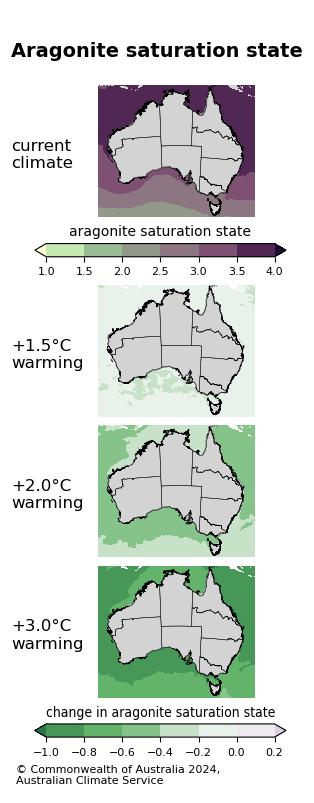

In [3]:
%%time
var="OAR"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/{var}_climatology_GW1p2.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/{var}_climatology_GW1p5.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl20 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/{var}_climatology_GW2p0.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl30 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/{var}_climatology_GW3p0.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_chem_seq'],
                       gwl12_cbar_extend= "both",
                       gwl12_cbar_label= "aragonite saturation state",
                       gwl12_ticks= np.arange(1, 4.1, 0.5),
                       gwl12_tick_rotation=0,
                       ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                       ds_gwl20=ds_gwl20[var] -ds_gwl12[var],
                       ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                       regions = regions,
                       title = "Aragonite saturation state",
                       cmap = cmap_dict["ipcc_chem_div"],
                       ticks=np.arange(-1., .21, 0.2),
                       tick_rotation=0,
                       cbar_label = "change in aragonite saturation state",
                       cbar_extend="both",
                       watermark="",
                       mask_not_australia=False,
                       mask_australia=True,
                       orientation="vertical",
                       subplot_titles=["current\nclimate",
                                       "+1.5\N{DEGREE SIGN}C\nwarming",
                                       "+2.0\N{DEGREE SIGN}C\nwarming",
                                       "+3.0\N{DEGREE SIGN}C\nwarming"],
                       issued_date="",
                       vcentre=0,
                       )

(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

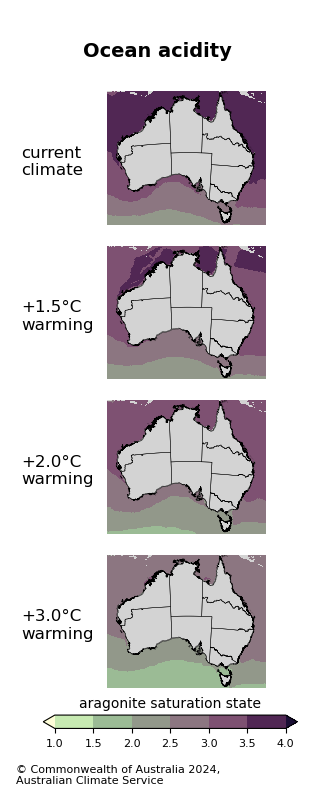

In [4]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                       ds_gwl20=ds_gwl20[var],
                       ds_gwl30=ds_gwl30[var],
                       regions = regions,
                       title = "Ocean acidity",
                       cmap = cmap_dict["ipcc_chem_seq"],
                       ticks=np.arange(1.,4.1, 0.5),
                       tick_rotation=0,
                       cbar_label = "aragonite saturation state",
                       cbar_extend="both",
                       watermark="",
                       mask_not_australia=False,
                       mask_australia=True,
                       orientation="vertical",
                       subplot_titles=["current\nclimate",
                                       "+1.5\N{DEGREE SIGN}C\nwarming",
                                       "+2.0\N{DEGREE SIGN}C\nwarming",
                                       "+3.0\N{DEGREE SIGN}C\nwarming"],
                       issued_date="",
                       # vcentre=1,
                       )